In [9]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### for the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{eff} \omega_{eff}}{z+1} \,
$$

### for an universe dominated by dark matter and dark energy, the Friedmann constraint is just $\Omega_{de} + \Omega_{d}=1$ 
### and $\Omega_{eff}=0$. Also, if we consider the interaction in the form $Q = 3 b^2 H \rho_c$. The last equation takes the form 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{3 b^2 \Omega_{de}}{1+z} \,
$$

In [26]:
# Different values for c 
c = [0.4,1.0, 1.15, 1.5, 2.1]
b2 =  0.1 # this is b^2 

''' 
We solve the equation using the odeint method and the differents values of b^2 and c.
Define the equations: 
'''

def modelz_1 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[0] + 1) + (3*y*b2)/(z+1) # using c = 0.4 

    return dydz



def modelz_2(y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[1] + 1) + (3*y*b2)/(z+1) # using c = 1.0

    return dydz

def modelz_3 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[2] + 1) + (3*y*b2)/(z+1) # using c = 1.15

    return dydz

def modelz_4(y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[3] + 1) + (3*y*b2)/(z+1) # using c = 1.5

    return dydz

def modelz_5 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[4] + 1) + (3*y*b2)/(z+1) # using c = 2.1

    return dydz



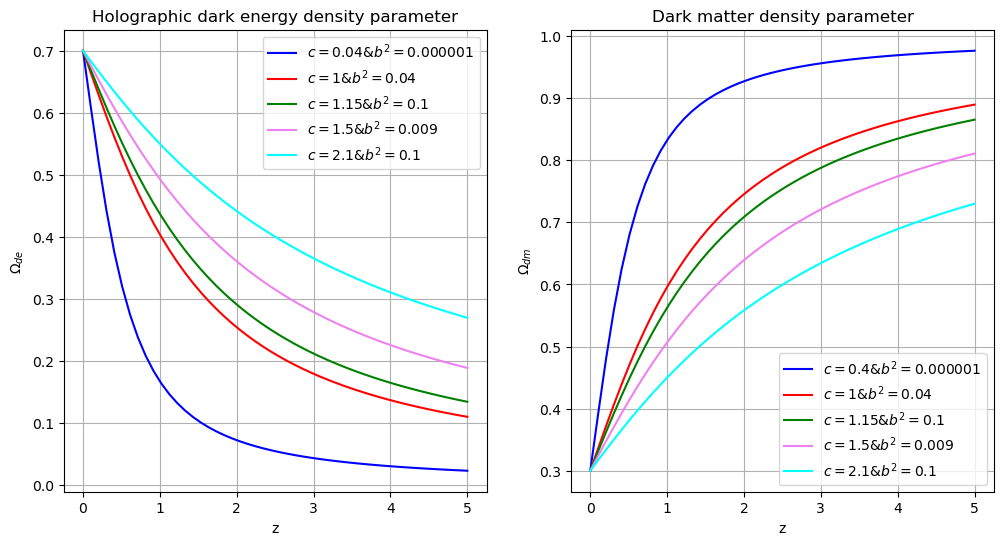

In [27]:
# Define the initial condition
y0 = 0.7
# Define the redshift interval 
z = np.linspace(0,5)


# the solutions for each equation 
solutions = [odeint(modelz_1,y0,z) ,odeint(modelz_2,y0,z),odeint(modelz_3,y0,z),odeint(modelz_4,y0,z),odeint(modelz_5,y0,z)]

# Using the Friedmann condition to calculate the dark matter evolution 

O_dm = [1-solutions[0],1-solutions[1],1-solutions[2],1-solutions[3],1-solutions[4]]

'''
The plots for the solutions are the following 
'''

# dark energy parameter density 
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(z,solutions[0],color='blue',label='$c=0.04$')
plt.plot(z,solutions[1],color='red',label='$c=1$')
plt.plot(z,solutions[2],color='green',label='$c=1.15$')
plt.plot(z,solutions[3],color='violet',label='$c=1.5$')
plt.plot(z,solutions[4],color='cyan',label='$c=2.1$')
plt.xlabel('z')
plt.legend()
plt.title('Holographic dark energy density parameter with $b^2 = 0.1$')
plt.ylabel('$\Omega_{de}$')
plt.grid()


#dark matter paramter density 
plt.subplot(1, 2, 2)
plt.plot(z,O_dm[0],color='blue',label='$c=0.4$')
plt.plot(z,O_dm[1],color='red',label='$c=1 & b^2 =0.04$')
plt.plot(z,O_dm[2],color='green',label='$c=1.15 & b^2 =0.1$')
plt.plot(z,O_dm[3],color='violet',label='$c=1.5 & b^2 =0.009$')
plt.plot(z,O_dm[4],color='cyan',label='$c=2.1 & b^2 =0.1$')
plt.xlabel('z')
plt.legend()
plt.title('Dark matter density parameter')
plt.ylabel('$\Omega_{dm}$')
plt.grid()



###  The general equation for the EoS parameter  
$$
 \omega_{de}= -\frac{1}{3}\left\{1+\frac{2\sqrt{\Omega_{de}}}{c}\right\}-\frac{Q}{3H\rho_{de}} +\frac{2\omega_{eff}\Omega_{eff}}{3(1-\Omega_{de})} 
$$


### Using the interection previously defined and $\Omega_{eff} = 0$ is
$$
\omega_{de}= -\frac{1}{3}\left( 1 + 2\frac{\sqrt{\Omega_{de}}}{c}\right) - \frac{b^2}{\Omega_{de}}1
$$


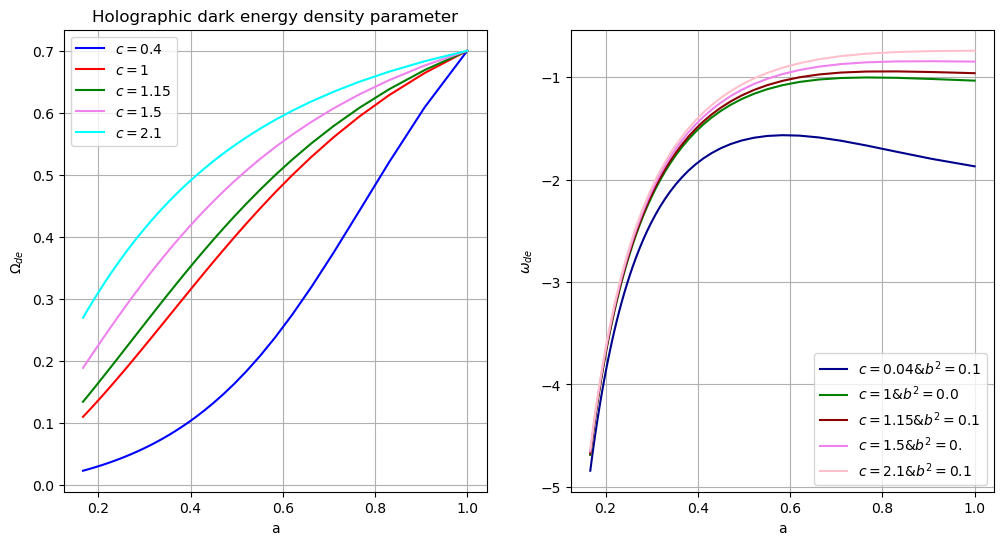

In [29]:

# The plots on the scalar factor are
a=1./(1+z)



# dark energy density parameter 
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(a,solutions[0],color='blue',label='$c=0.4$')
plt.plot(a,solutions[1],color='red',label='$c=1 $')
plt.plot(a,solutions[2],color='green',label='$c=1.15$')
plt.plot(a,solutions[3],color='violet',label='$c=1.5$')
plt.plot(a,solutions[4],color='cyan',label='$c=2.1$')
plt.xlabel('a')
plt.legend()
plt.title('Holographic dark energy density parameter')
plt.ylabel('$\Omega_{de}$')
plt.grid()


plt.subplot(1, 2, 2)
# Define the EoS parameter using the solutions 
eos = []
for i in solutions: # these are the solutions for DE 
    for j in c:    # these are the c values 
        omega = -(1/3)*(1+ (2*np.sqrt(i))/(j)) - b2/i
        eos.append(omega)
        
plt.plot(a,eos[0],color='darkblue',label='$c=0.04 & b^2 =0.1$')
plt.plot(a,eos[1],color='green',label='$c=1 & b^2 =0.0$')
plt.plot(a,eos[2],color='darkred',label='$c=1.15 & b^2 =0.1$')
plt.plot(a,eos[3],color='violet',label='$c=1.5 & b^2 =0.$')
plt.plot(a,eos[4],color='pink',label='$c=2.1 & b^2 =0.1$')
plt.legend()
plt.ylabel('$\omega_{de}$')
plt.xlabel("a")
plt.grid()
plt.savefig("Omegas_a.png")


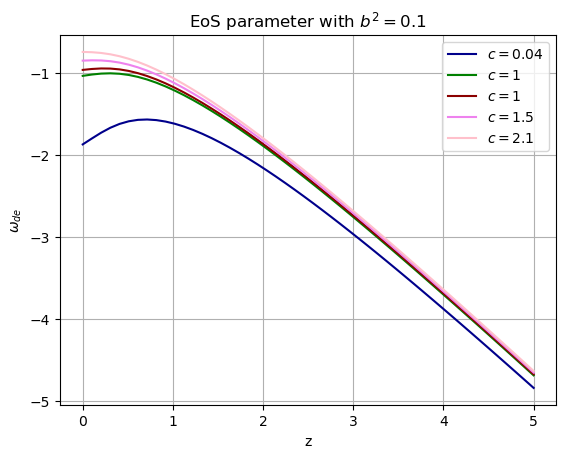

In [44]:

# on redshif 
eos_z = []
for j in c:
    for i in solutions:
        omega_z = -(1/3)*(1+ (2*np.sqrt(i))/(j)) - b2/i
        eos_z.append(omega_z)
        
plt.plot(z,eos[0],color='darkblue',label='$c=0.04$')
plt.plot(z,eos[1],color='green',label='$c=1$')
plt.plot(z,eos[2],color='darkred',label='$c=1$')
plt.plot(z,eos[3],color='violet',label='$c=1.5$')
plt.plot(z,eos[4],color='pink',label='$c=2.1$')
plt.title('EoS parameter with $b^2 =0.1$')
plt.legend()
plt.ylabel('$\omega_{de}$')
plt.xlabel("z")
plt.grid()



## using the definition of of the redshif $a = 1/(1+z)$, the equation for the evoluion of dark energy on the scalar factor is 
$$
\frac{d \Omega_{de}}{da} = - a^3 (\Omega_{de}(\Omega_{de} -1 )) \left( \frac{2 \sqrt{\Omega_{de}}}{c} + 1 \right) - 3 b^2 a^3
$$

In [56]:
'''
Shooting algorithm using bisection method to find the initial conditions of the dark energy evolution equation 
'''
from scipy.integrate import solve_ivp
# Define the holographic dark energy model with interaction on a 
def modela_11 (y,ax):
     
    dyda =-(ax**3)*(y*(y-1))*((2*(np.sqrt(y)))/c[0] + 1) + (3*y*b2)*(ax**3)

    return dyda


def shooting_method(y_guess, target_value):
    # Define the shooting method
    def objective(y0):
        sol = solve_ivp(modela_11,[0.2,1], [y0], t_eval=[1], method='RK45')
        return sol.y[0, 0] - target_value

    return objective(y_guess)

def bisection_method(a, b, target_value, tolerance=1e-6, max_iterations=100):
    # Implement the bisection method
    iterations = 0
    while iterations < max_iterations:
        c = (a + b) / 2
        if shooting_method(a, target_value) * shooting_method(c, target_value) < 0:
            b = c
        else:
            a = c

        if abs(b - a) < tolerance:
            break

        iterations += 1

    return (a + b) / 2





In [88]:



if __name__ == "__main__":
    # Set the target value and initial guess range
    target_value = 0.7
    initial_guess_lower = 0.0
    initial_guess_upper = 1.0

    # Use bisection to find the initial condition
    initial_condition = bisection_method(initial_guess_lower, initial_guess_upper, target_value)

    # Solve the differential equation with the found initial condition
    solution = solve_ivp(modela_11,[0.2,1], [initial_condition], method='RK45')

    print("Initial condition for target value", target_value, ":", initial_condition)
    print("Solution at a=0.2 :", solution.y[0, -1])



Initial condition for target value 0.7 : 0.5193657875061035
Solution at a=0.2 : 0.7000005333396881
